![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Introduction to Machine Learning </center>
## <center> Lecture 20 - CNN</center>
### <center> Object Detection</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/IntroductionToMachineLearning/20_CNN_Architectures/MainObjectDetection.ipynb)

In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib 

### Coco labels:
Coco data:
https://cocodataset.org/#home

In [3]:
COCO_LABELS = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

numLabels = len(COCO_LABELS)

### Load a pretrained model:

In [4]:
import torchvision

oModel = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True).eval()

### Load images from pexels:
https://www.pexels.com/

In [5]:
import torchvision.transforms.functional as TF
import PIL

dirPath        = '../../Data/Pexels/'
lImageFileName = [
    'pexels-photo-736716.jpeg',
    'pexels-photo-109919.jpeg',
    'pexels-photo-2914265.jpeg',
    'pexels-photo-1031698.jpeg',
]

def GetImage(idx):
    fileName = dirPath + lImageFileName[idx]
    mI       = TF.to_tensor(PIL.Image.open(fileName))
    
    return mI

### Load an image:

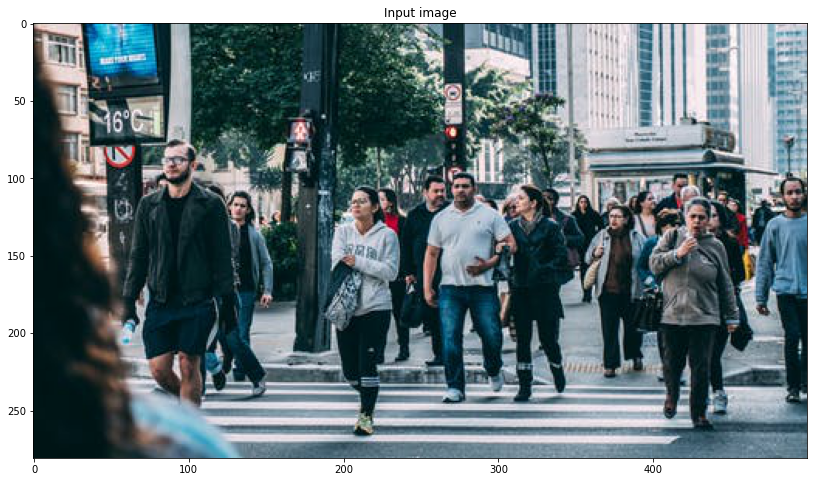

In [6]:
mI = GetImage(1)
_, ax = plt.subplots(figsize=(18,8))
ax.imshow(mI.numpy().transpose(1,2,0))
ax.set_title('Input image')
plt.show()

### Apply the model:

In [7]:
lOut = oModel([mI])[0]
lOut

C:\Users\Or\anaconda3\lib\site-packages\torchvision\ops\boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


{'boxes': tensor([[464.9375, 100.4498, 500.0000, 248.6700],
         [189.4659, 105.5522, 235.8185, 269.6030],
         [251.6461,  94.8412, 312.3853, 246.6332],
         [ 55.7086,  77.2940, 132.4530, 249.7658],
         [394.6754, 113.5672, 458.6435, 262.8413],
         [300.4210, 105.1867, 349.8382, 245.1632],
         [354.8467, 116.1138, 397.7616, 231.5575],
         [117.3027, 107.0946, 154.6227, 240.9635],
         [235.1393,  96.7604, 268.0642, 220.5004],
         [188.1137, 154.5766, 210.0719, 197.4676],
         [347.7891, 110.5082, 367.7106, 158.8668],
         [236.6344, 168.0009, 252.7457, 196.4418],
         [265.8467,  65.8820, 275.4590,  82.2689],
         [222.4879, 106.6427, 239.5199, 141.5514],
         [451.6872, 174.8965, 465.4864, 212.4268],
         [  0.0000,  27.0812,  68.7056, 276.9504],
         [152.6711, 121.5799, 160.3360, 131.5440],
         [463.3598, 113.2402, 480.2985, 150.2039],
         [386.7363, 108.3556, 403.3836, 139.5051],
         [437.8806, 11

### Plot results:

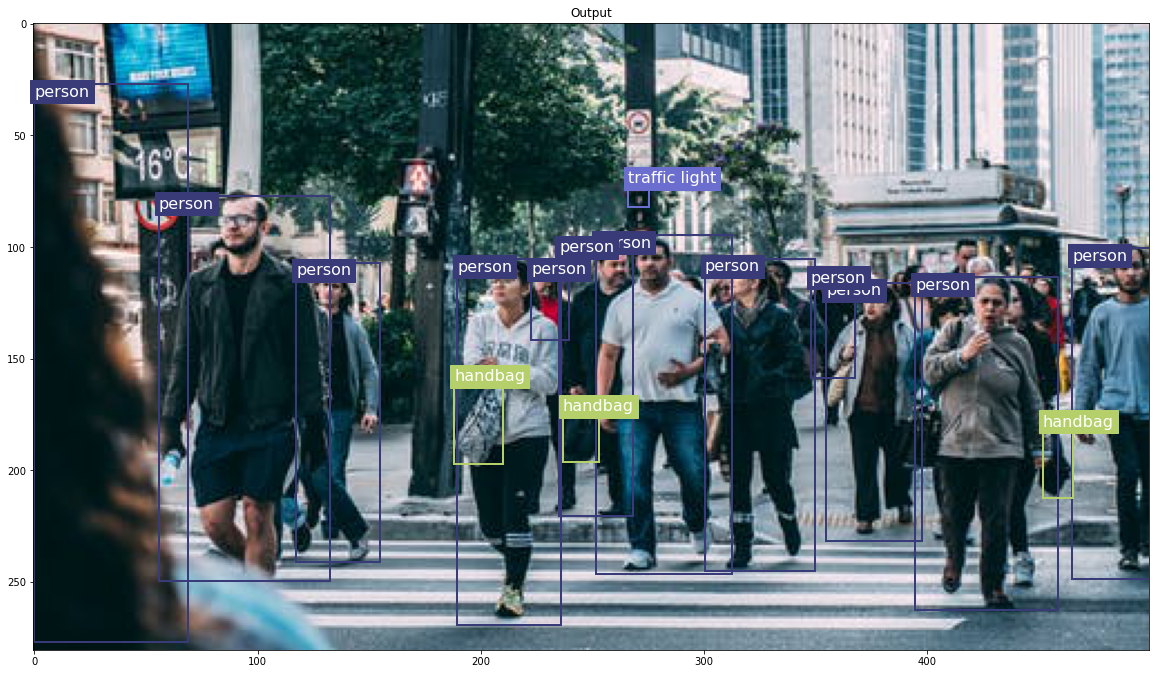

In [8]:
cmap    = plt.get_cmap('tab20b')
lColors = [cmap(ii) for ii in np.linspace(0, 1, numLabels)]

_, ax = plt.subplots(figsize=(20,20))
ax.imshow(mI.numpy().transpose(1,2,0))
ax.set_title('Output')
for ii in range(len(lOut['labels'])):
    if lOut['scores'][ii] < 0.75:
        continue
        
    vBBox  = lOut['boxes'][ii]
    label  = lOut['labels'][ii]
    x, y   = vBBox[:2]
    width  = vBBox[2] - vBBox[0]
    height = vBBox[3] - vBBox[1]
    color  = lColors[label]
    oBbox  = matplotlib.patches.Rectangle((x, y), width, height, linewidth=2, edgecolor=color, facecolor='none')
    
    ax.add_patch(oBbox)
    ax.text(x, y, s=COCO_LABELS[label], color='white', verticalalignment='top', bbox={'color':color}, fontdict={'size':16})
plt.show()